## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

## Reading Dataset

In [2]:
df = pd.read_csv('Frozen_Dessert_Production.csv', parse_dates=True, index_col='DATE')
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [3]:
df.columns = ['Production']
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


In [4]:
df.tail()

,Production
DATE,
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632
2019-08-01,102.6085
2019-09-01,101.5866


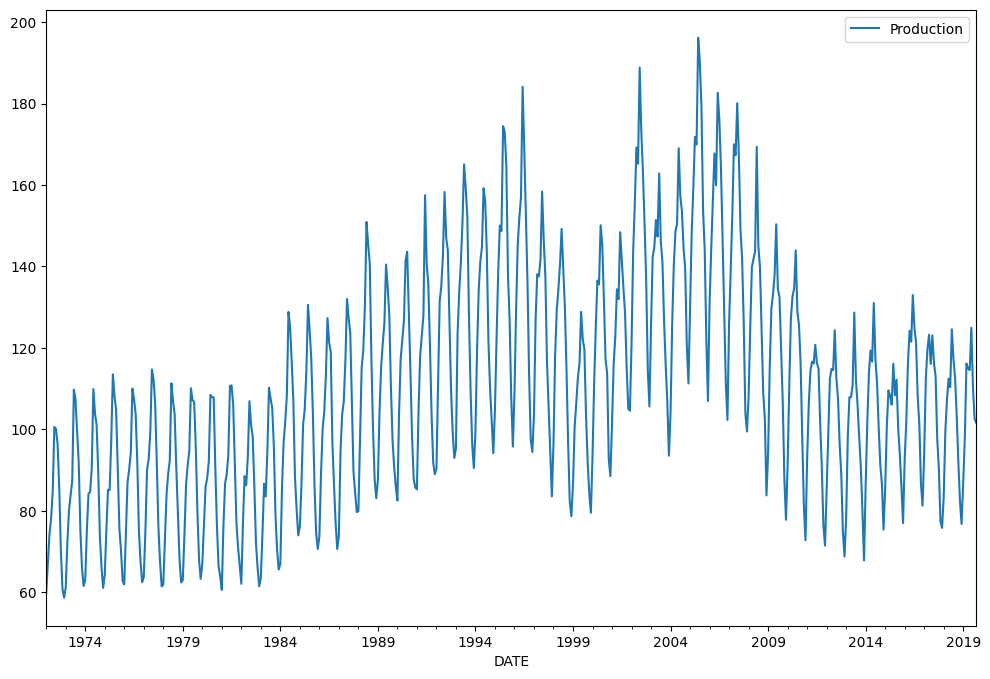

In [5]:
df.plot(figsize=(12,8));

## Train Test Split

In [6]:
len(df)

573

In [7]:
len(df) - 24

549

In [8]:
test_size = 24
test_index = len(df) - test_size

In [9]:
train_set = df.iloc[:test_index]
test_set = df.iloc[test_index:]

In [10]:
len(test_set)

24

## Normalization

In [11]:
scaler = MinMaxScaler()

In [12]:
train_set_scaled = scaler.fit_transform(train_set)
test_set_scaled = scaler.transform(test_set)

## Time Series Generator

In [13]:
len(test_set)

24

In [14]:
length = 18
batch_size = 1

generator = TimeseriesGenerator(
    data=train_set_scaled,
    targets=train_set_scaled,
    length=length,
    batch_size=batch_size
)

In [15]:
len(train_set_scaled)

549

In [16]:
len(generator)

531

In [17]:
X, y = generator[0]

In [18]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ],
        [0.01774221],
        [0.09850931],
        [0.15590133],
        [0.18358944],
        [0.20878908],
        [0.37150354]]])

In [19]:
y

array([[0.3542551]])

In [20]:
train_set_scaled

array([[0.00947104],
       [0.06108982],
       [0.11326273],
       [0.14145625],
       [0.18982663],
       [0.30495972],
       [0.30154406],
       [0.27416065],
       [0.19736841],
       [0.08532665],
       [0.01561588],
       [0.        ],
       [0.01774221],
       [0.09850931],
       [0.15590133],
       [0.18358944],
       [0.20878908],
       [0.37150354],
       [0.3542551 ],
       [0.29817568],
       [0.23973867],
       [0.12104304],
       [0.05289938],
       [0.02087498],
       [0.03141355],
       [0.12133246],
       [0.18622481],
       [0.18855185],
       [0.23182893],
       [0.37263651],
       [0.32891584],
       [0.30809031],
       [0.22409662],
       [0.10933731],
       [0.05452176],
       [0.01749278],
       [0.04076752],
       [0.12186114],
       [0.19277469],
       [0.19221257],
       [0.28139264],
       [0.39898221],
       [0.35985962],
       [0.3357137 ],
       [0.22874706],
       [0.12405219],
       [0.08404241],
       [0.029

## Creating the Model

In [21]:
num_of_features = 1

In [22]:
model = Sequential()

model.add(LSTM(units=150 , activation='relu', input_shape=(length, num_of_features)))
model.add(Dense(units=1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model

In [24]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=2
)

In [25]:
length = 18
batch_size = 1

In [26]:
validation_generator = TimeseriesGenerator(
    data=test_set_scaled,
    targets=test_set_scaled,
    length=length,
    batch_size=batch_size
)

In [27]:
model.fit(
    generator,
    validation_data=validation_generator,
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0362 - val_loss: 0.0035
Epoch 2/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0091 - val_loss: 0.0021
Epoch 3/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0057 - val_loss: 0.0034
Epoch 4/20
531/531 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0038 - val_loss: 0.0043


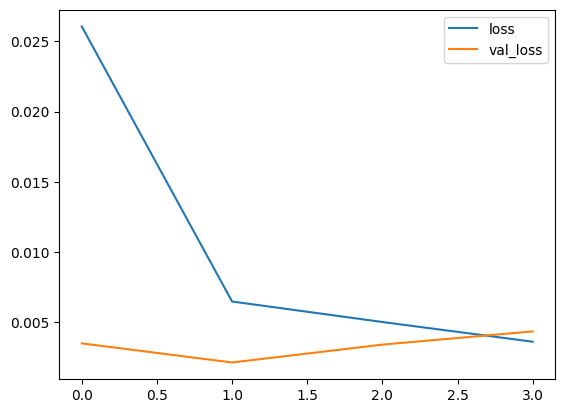

In [28]:
losses = pd.DataFrame(model.history.history)
losses.plot();

## Evaluation on Test Data

In [29]:
test_predictions = []

first_eval_batch = train_set_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(len(test_set)):
    current_prediction = model.predict(current_batch)[0]
    test_predictions.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


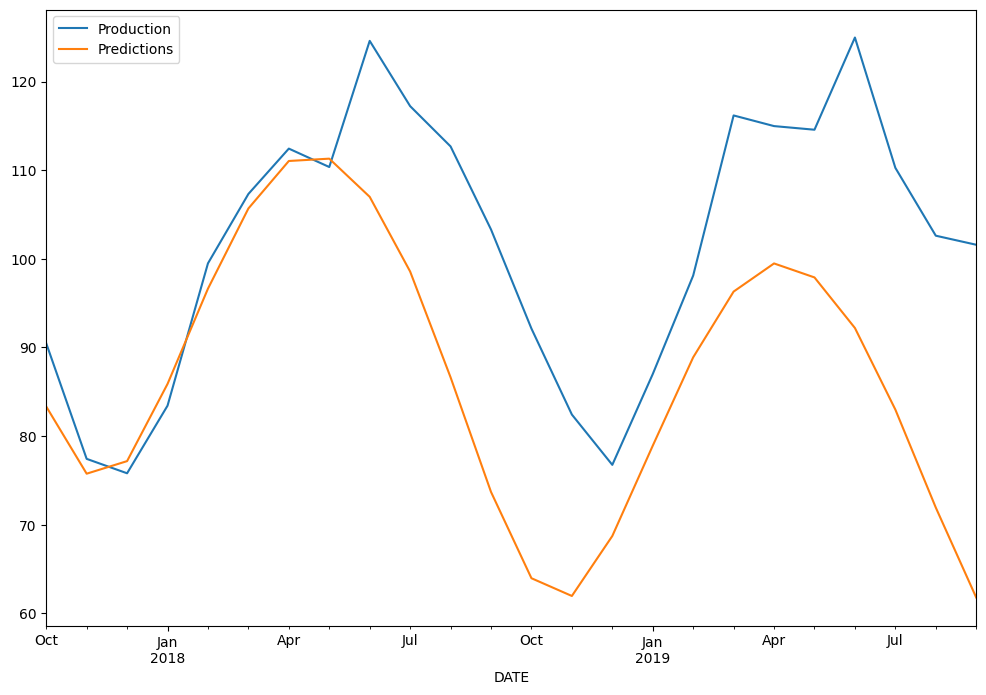

In [30]:
true_predictions = scaler.inverse_transform(test_predictions)
test_set['Predictions'] = true_predictions
test_set.plot(figsize=(12,8));

## Calculate RMSE

In [31]:
np.sqrt(mean_squared_error(test_set['Production'], test_set['Predictions']))

19.32824383334926

## Forecast into Unknown Future

In [32]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [33]:
length = 18
batch_size = 1

In [34]:
generator = TimeseriesGenerator(
    data=scaled_full_data,
    targets=scaled_full_data,
    length=length,
    batch_size=batch_size
)

In [35]:
num_of_features = 1

In [36]:
model = Sequential()

model.add(LSTM(units=150 , activation='relu', input_shape=(length, num_of_features)))
model.add(Dense(units=1))

model.compile(
    optimizer='adam',
    loss='mse'
)

In [37]:
model.fit(
    generator,
    epochs=8,
)

Epoch 1/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0498
Epoch 2/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0114
Epoch 3/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0046
Epoch 4/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0041
Epoch 5/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
Epoch 6/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0033
Epoch 7/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0031
Epoch 8/8
555/555 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0027


In [38]:
forecast = []
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, num_of_features))

for i in range(periods):
    current_prediction = model.predict(current_batch)[0]
    forecast.append(current_prediction)
    current_batch = np.append(current_batch[:,1:,:], [[current_prediction]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [39]:
forecast = full_scaler.inverse_transform(forecast)

In [40]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


In [41]:
forecast

array([[ 85.74984116],
       [ 78.25713906],
       [ 78.57515994],
       [ 87.29347362],
       [ 98.16896427],
       [107.07975764],
       [113.31465448],
       [116.14682896],
       [114.3702488 ],
       [107.78248995],
       [ 97.48483794],
       [ 85.26695654]])

In [42]:
forecast_index = pd.date_range(
    start='2019-09-02', 
    periods=periods,
    freq="MS"
)

forecast_index

DatetimeIndex(['2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01'],
              dtype='datetime64[ns]', freq='MS')

In [43]:
forecast_df = pd.DataFrame(
    data=forecast,
    index=forecast_index,
    columns=['Forecast']
)

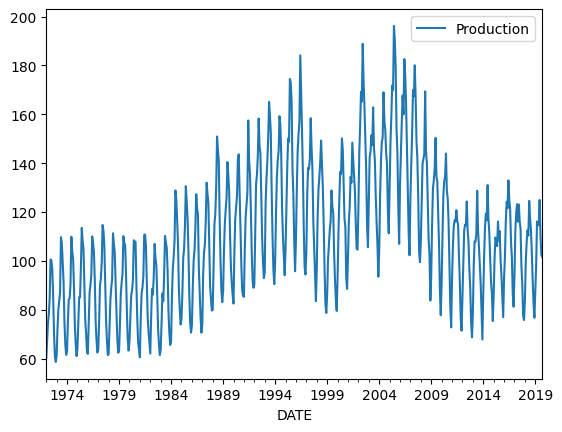

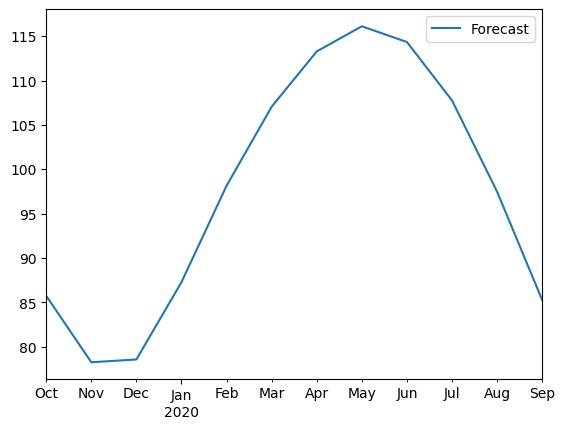

In [44]:
df.plot()
forecast_df.plot();

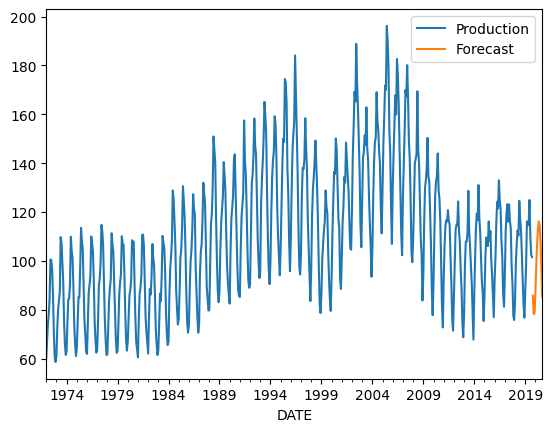

In [45]:
ax = df.plot()
forecast_df.plot(ax=ax);

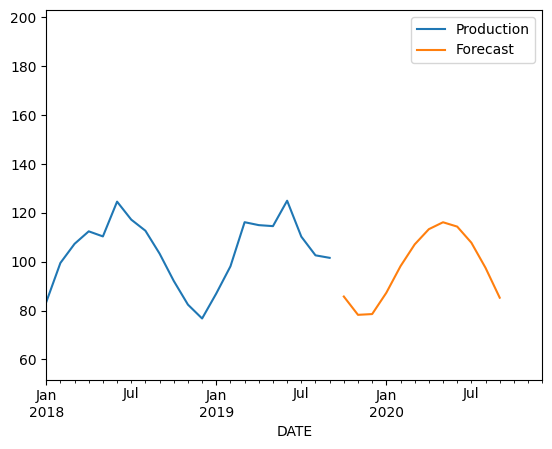

In [46]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01', '2020-12-01');